# year_related_economic_data_numeric_only_for_modeling

In [1]:
import pandas as pd


In [3]:
df = pd.read_csv('year_related_economic_data_numeric_only_for_modeling.csv')
df.head()


,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,1yr_fed_funds_pct_change,1yr_cpi_pct_change,action
0,1951,29.029773,-15.020485,-35.340175,NaN,10.564877,NaN,NaN,buy
1,1952,19.887514,-24.103316,-7.507572,NaN,5.165332,NaN,NaN,sell
2,1953,4.972609,5.171929,-2.239049,-2.474865,6.189877,NaN,NaN,buy
3,1954,18.549472,76.504025,97.397452,-0.118953,-1.781925,NaN,NaN,buy
4,1955,55.606807,74.416946,-21.375729,16.990869,6.170199,NaN,NaN,buy


In [4]:
df.describe()

,year,price_yoy_pct_change,volume_yoy_pct_change,1yr_u_rate_pct_diff,1yr_sentiment_pct_change,1yr_gdp_pct_change,1yr_fed_funds_pct_change,1yr_cpi_pct_change
count,74.000000,74.000000,74.000000,74.000000,72.000000,74.000000,5.000000,62.000000
mean,1987.500000,13.465853,24.719933,2.718524,0.371841,3.150271,6.679905,16.008321
std,21.505813,17.028224,25.974533,25.629963,10.074258,2.612530,9.831386,152.262129
min,1951.000000,-32.202558,-24.103316,-35.340175,-25.511198,-3.234227,-0.953299,-561.274269
25%,1969.250000,4.015125,5.065025,-9.530471,-4.512437,1.684660,-0.196831,-25.298803
50%,1987.500000,15.335354,27.241115,-5.701315,0.508720,3.215030,0.136204,5.682334
75%,2005.750000,22.732656,42.811201,6.133755,6.212281,4.335255,14.323897,32.371367
max,2024.000000,55.606807,89.688976,121.924519,28.552164,10.564877,20.089552,963.486191


In [5]:
df.isnull().sum()

year                         0
price_yoy_pct_change         0
volume_yoy_pct_change        0
1yr_u_rate_pct_diff          0
1yr_sentiment_pct_change     2
1yr_gdp_pct_change           0
1yr_fed_funds_pct_change    69
1yr_cpi_pct_change          12
action                       1
dtype: int64

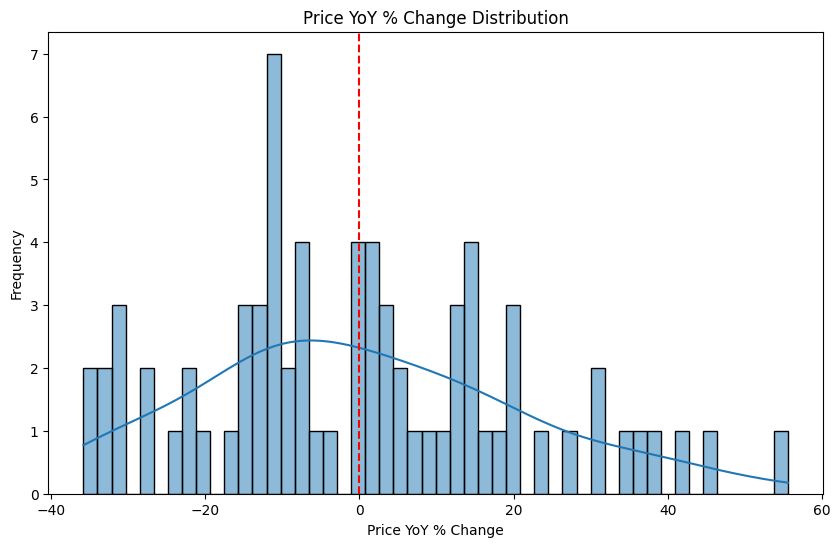

the probability that prices will rise: 0.47


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


df['price_change'] = df['price_yoy_pct_change'].diff()


price_increase_prob = df['price_change'].apply(lambda x: 1 if x > 0 else 0).mean()


plt.figure(figsize=(10, 6))
sns.histplot(df['price_change'], bins=50, kde=True)
plt.title('Price YoY % Change Distribution')
plt.xlabel('Price YoY % Change')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')
plt.show()

print(f"the probability that prices will rise: {price_increase_prob:.2f}")

/var/folders/hh/y_v1hz5n2xn1vh3yzx5r1hqw0000gn/T/ipykernel_37545/7690356.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


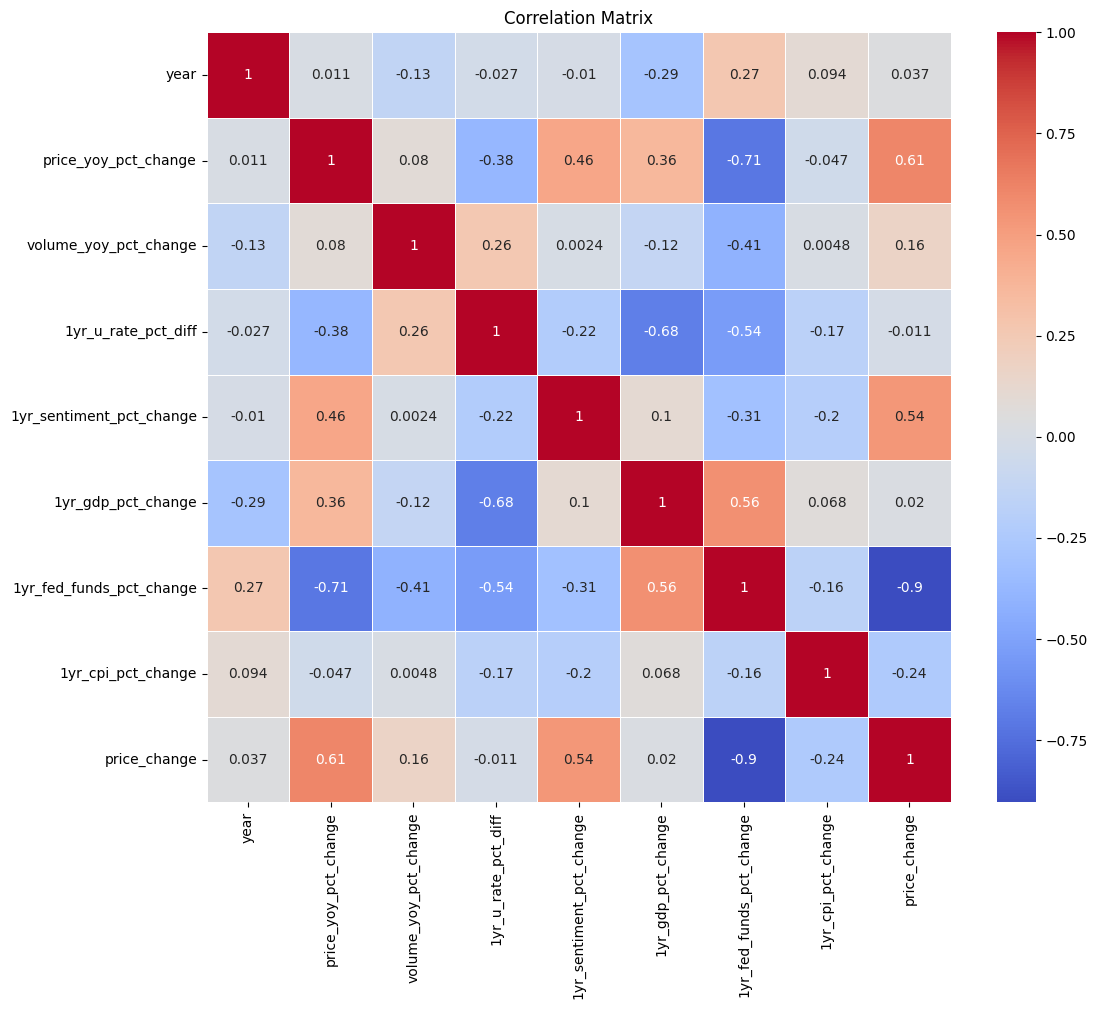

In [9]:
correlation_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

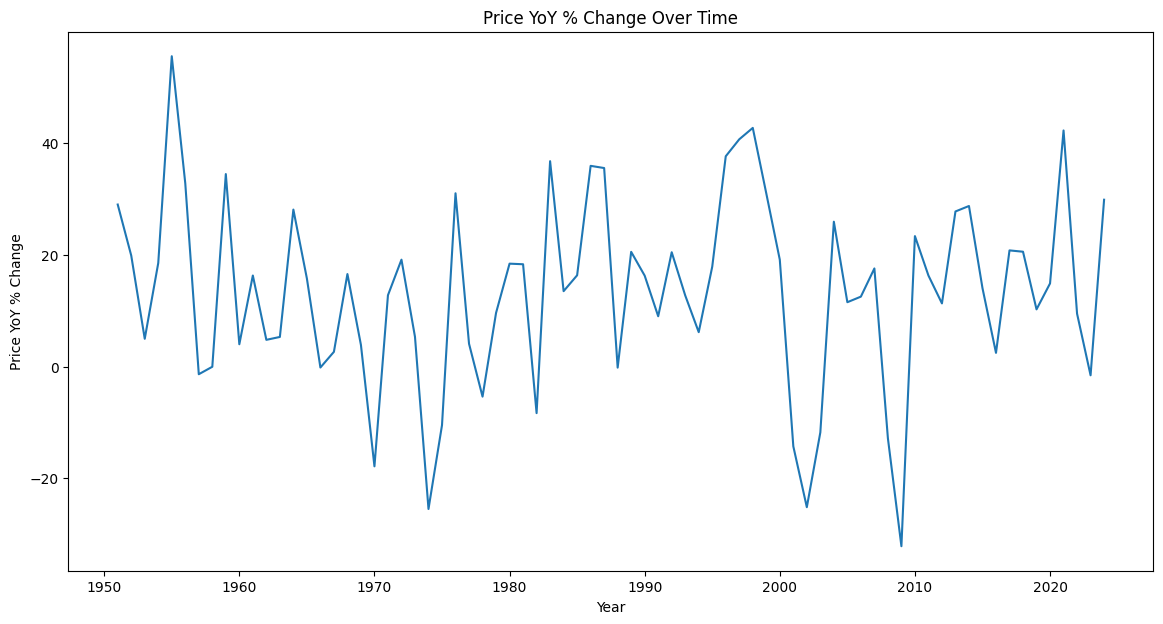

In [10]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year', y='price_yoy_pct_change')
plt.title('Price YoY % Change Over Time')
plt.xlabel('Year')
plt.ylabel('Price YoY % Change')
plt.show()

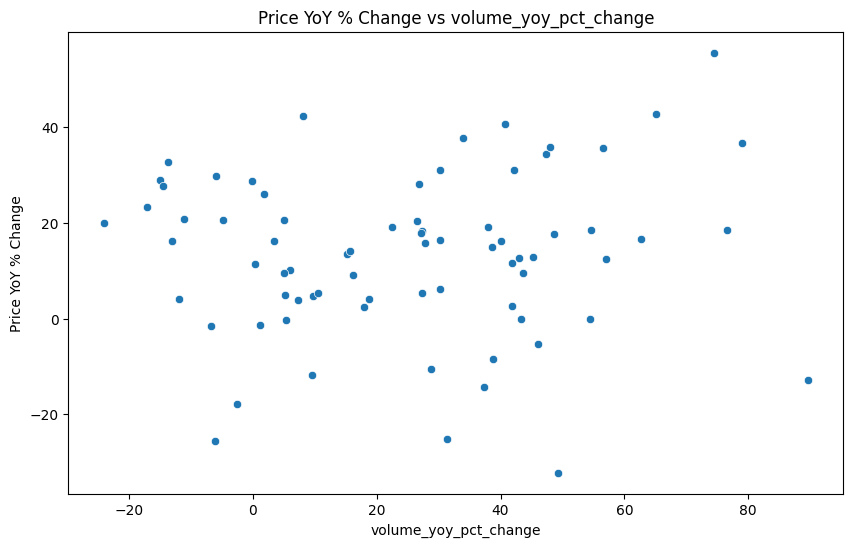

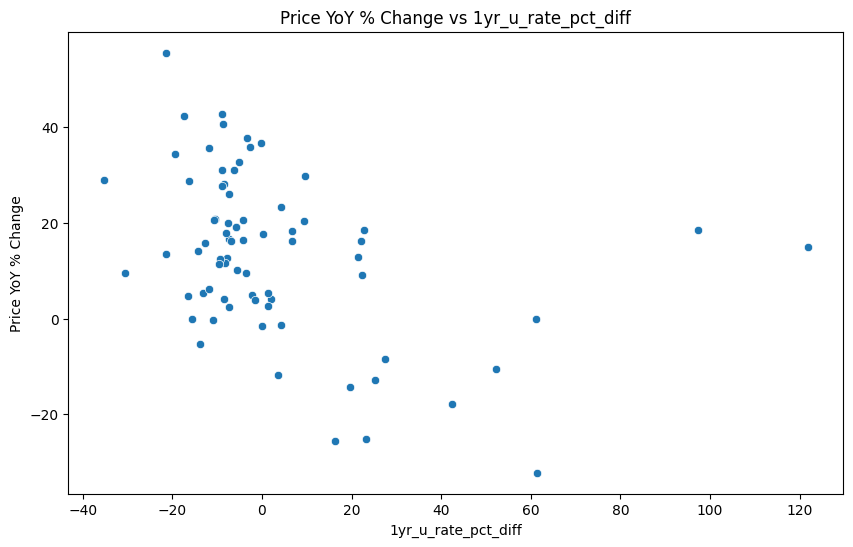

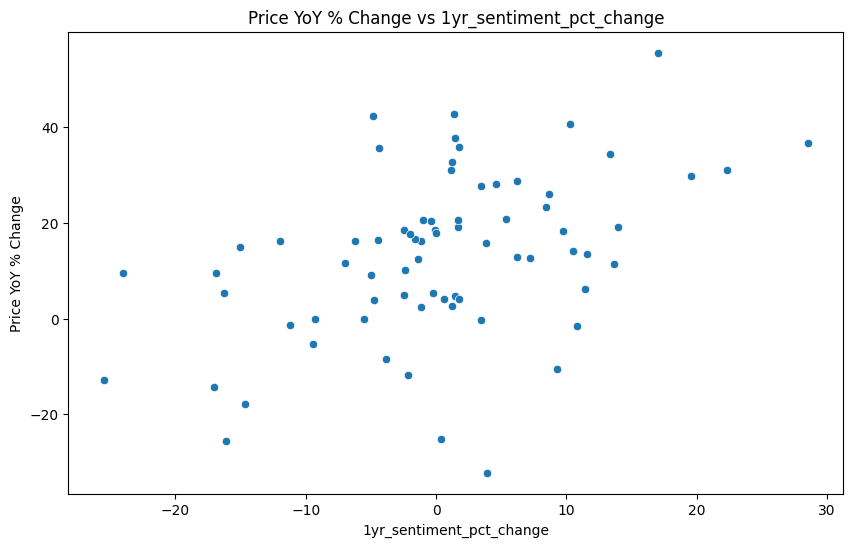

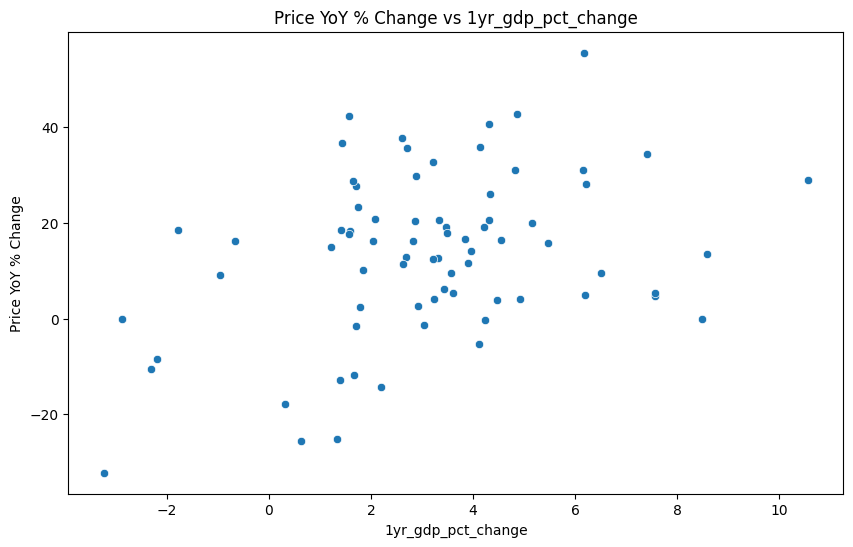

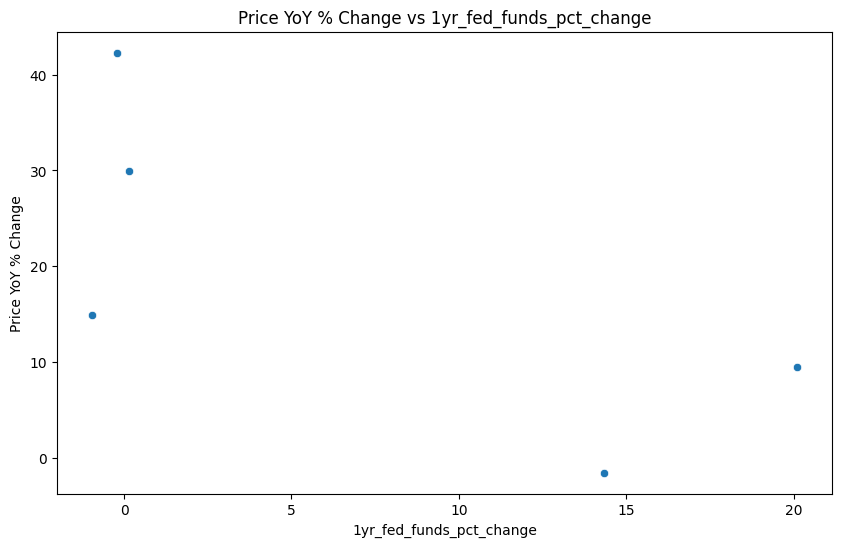

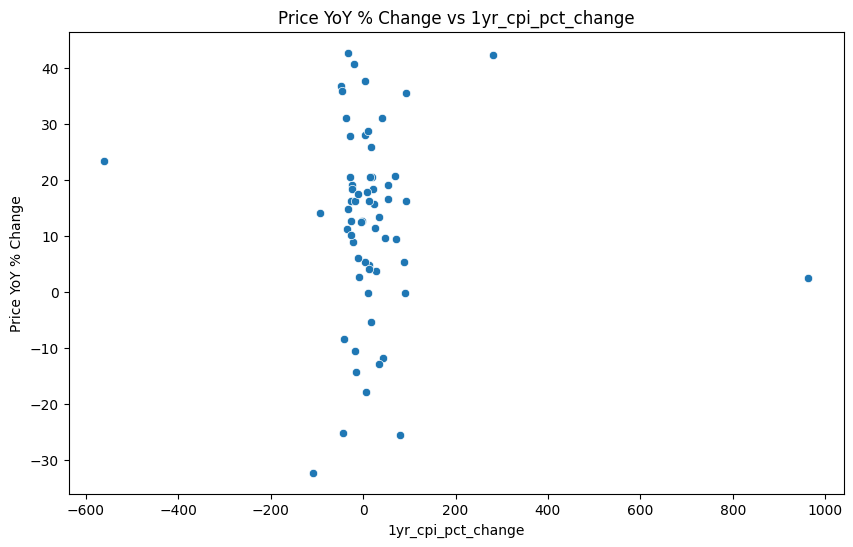

In [11]:
key_columns = [
    'volume_yoy_pct_change',
    '1yr_u_rate_pct_diff',
    '1yr_sentiment_pct_change',
    '1yr_gdp_pct_change',
    '1yr_fed_funds_pct_change',
    '1yr_cpi_pct_change'
]


for col in key_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='price_yoy_pct_change')
    plt.title(f'Price YoY % Change vs {col}')
    plt.xlabel(col)
    plt.ylabel('Price YoY % Change')
    plt.show()

# Unemployment Rate

In [12]:
df2 = pd.read_csv('u_rate_processed.csv')
df2

,date,base_u_rate,1m_u_rate_pct_change,1yr_u_rate_pct_diff
0,1948-01-01,3.4,NaN,NaN
1,1948-02-01,3.8,11.764706,NaN
2,1948-03-01,4.0,5.263158,NaN
3,1948-04-01,3.9,-2.500000,NaN
4,1948-05-01,3.5,-10.256410,NaN
...,...,...,...,...
912,2024-01-01,3.7,0.000000,8.823529
913,2024-02-01,3.9,5.405405,8.333333
914,2024-03-01,3.8,-2.564103,8.571429
915,2024-04-01,3.9,2.631579,14.705882


In [14]:
df2.describe()

,base_u_rate,1m_u_rate_pct_change,1yr_u_rate_pct_diff
count,917.000000,916.000000,905.000000
mean,5.694656,0.224448,3.288595
std,1.710558,8.801046,30.727184
min,2.500000,-18.987342,-58.783784
25%,4.400000,-2.272727,-11.475410
50%,5.500000,0.000000,-5.263158
75%,6.700000,2.000000,7.843137
max,14.800000,236.363636,300.000000


In [15]:
df2.isnull().sum()

date                     0
base_u_rate              0
1m_u_rate_pct_change     1
1yr_u_rate_pct_diff     12
dtype: int64

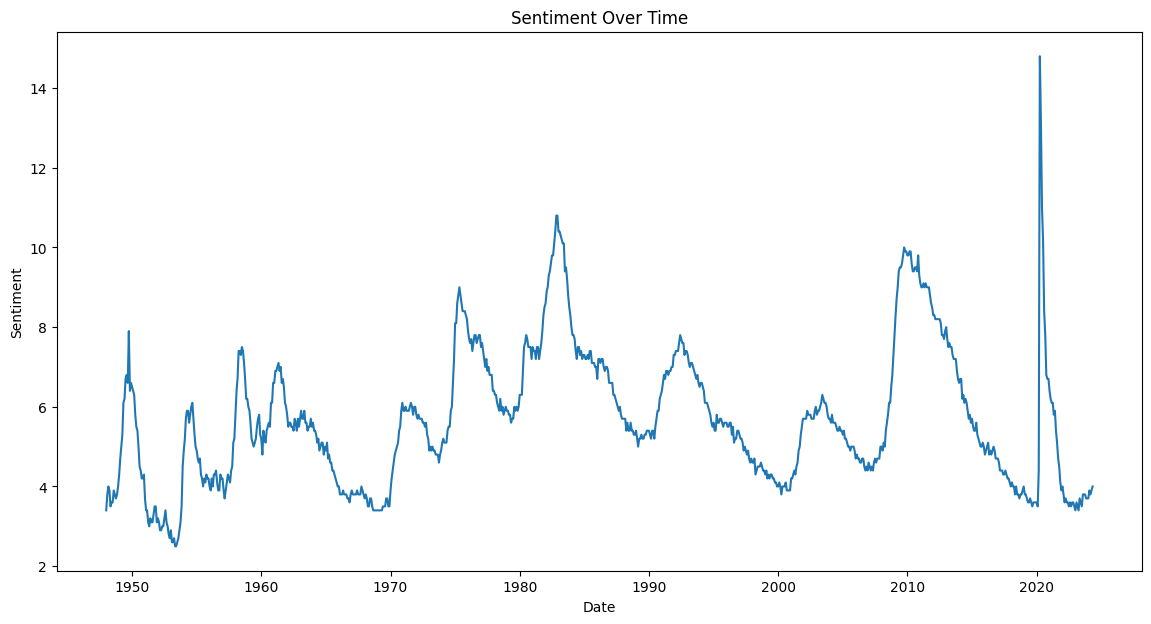

In [31]:
df2['date'] = pd.to_datetime(df2['date'])


plt.figure(figsize=(14, 7))
sns.lineplot(data=df2, x='date', y='base_u_rate')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.show()

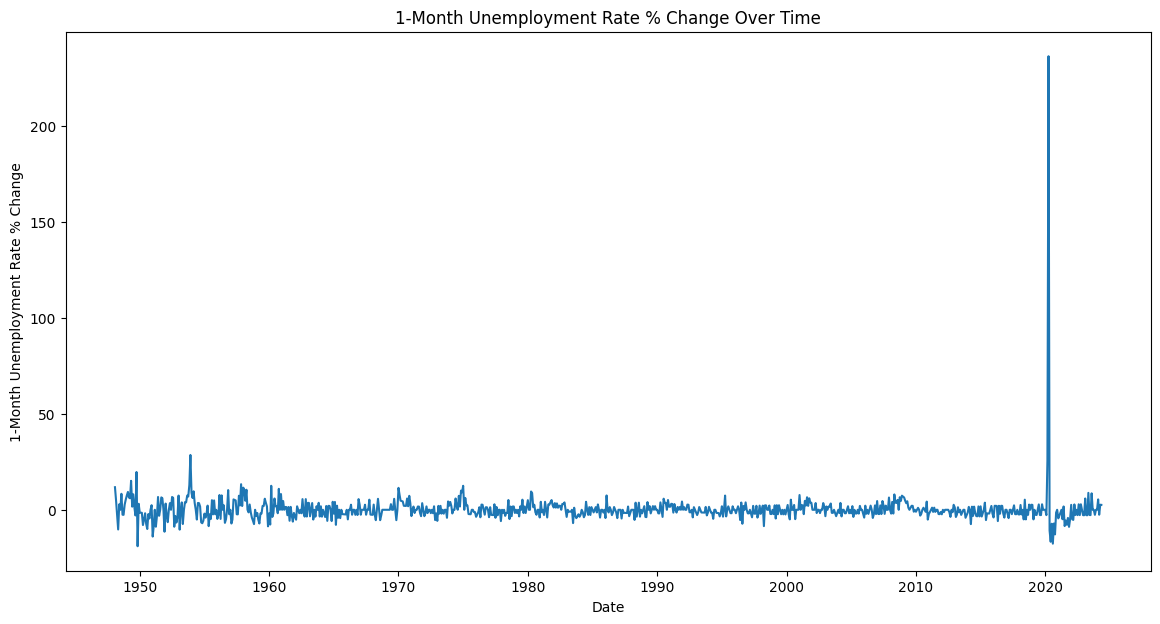

In [17]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df2, x='date', y='1m_u_rate_pct_change')
plt.title('1-Month Unemployment Rate % Change Over Time')
plt.xlabel('Date')
plt.ylabel('1-Month Unemployment Rate % Change')
plt.show()

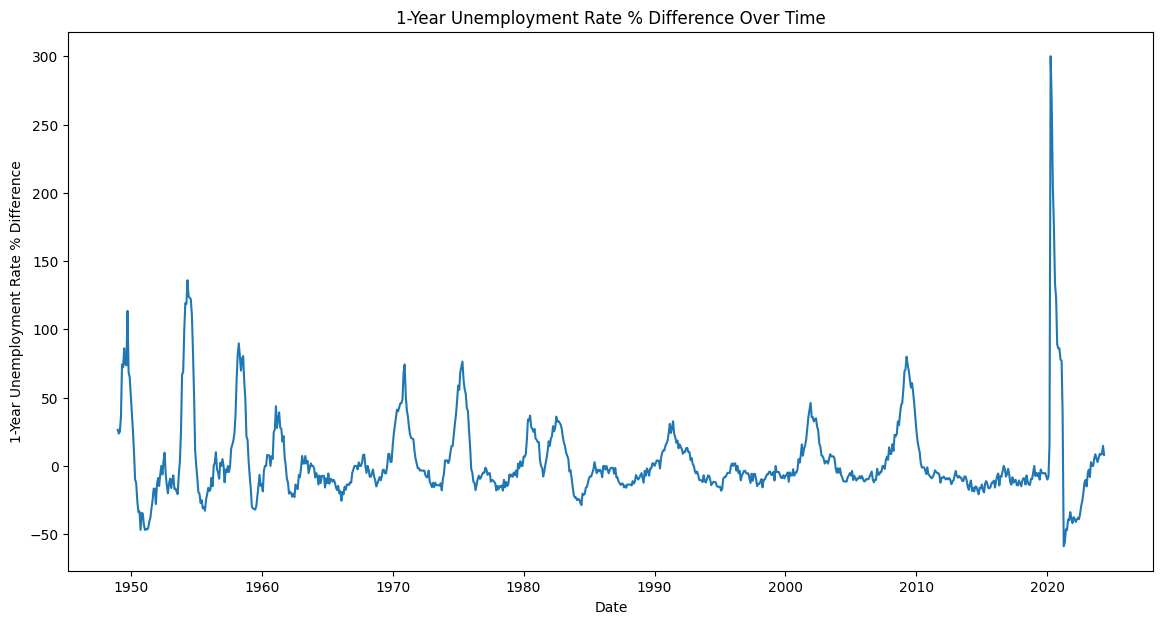

In [18]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df2, x='date', y='1yr_u_rate_pct_diff')
plt.title('1-Year Unemployment Rate % Difference Over Time')
plt.xlabel('Date')
plt.ylabel('1-Year Unemployment Rate % Difference')
plt.show()

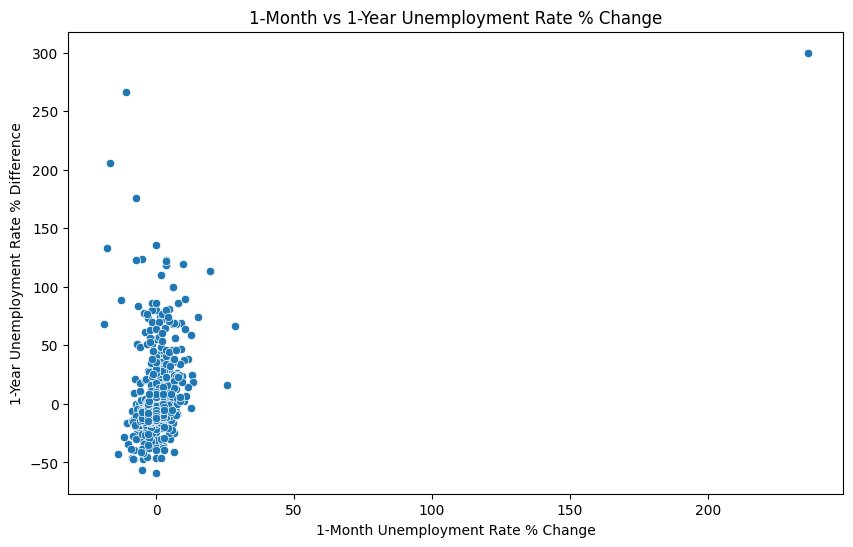

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='1m_u_rate_pct_change', y='1yr_u_rate_pct_diff')
plt.title('1-Month vs 1-Year Unemployment Rate % Change')
plt.xlabel('1-Month Unemployment Rate % Change')
plt.ylabel('1-Year Unemployment Rate % Difference')
plt.show()

# Consumer Confidence Index	

In [26]:
df3 = pd.read_csv('sentiment_processed.csv')

df3.head()

,date,base_sentiment,1yr_sentiment_pct_change
0,1952-01-01,86.200000,NaN
1,1953-01-01,84.066667,-2.474865
2,1954-01-01,83.966667,-0.118953
3,1955-01-01,98.233333,16.990869
4,1956-01-01,99.433333,1.221581


In [27]:
df3.describe()

,base_sentiment,1yr_sentiment_pct_change
count,73.000000,72.000000
mean,86.202854,0.371841
std,11.499393,10.074258
min,58.975000,-25.511198
25%,78.125000,-4.512437
50%,88.300000,0.508720
75%,94.550000,6.212281
max,107.575000,28.552164


In [28]:
df3.isnull().sum()

date                        0
base_sentiment              0
1yr_sentiment_pct_change    1
dtype: int64

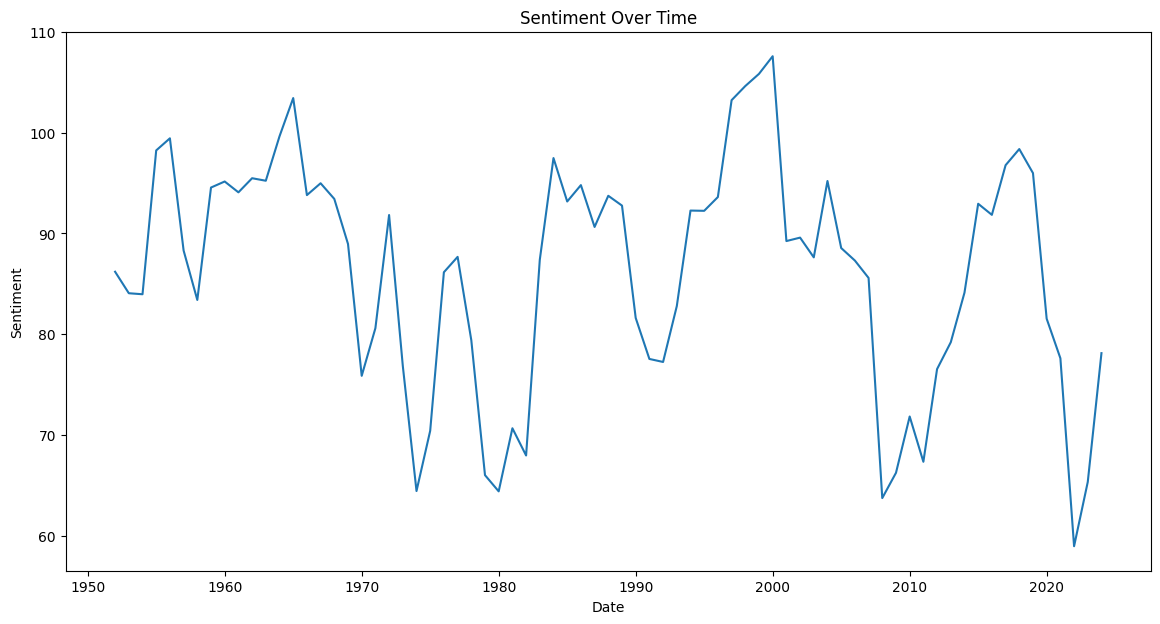

In [30]:
df3['date'] = pd.to_datetime(df3['date'])


plt.figure(figsize=(14, 7))
sns.lineplot(data=df3, x='date', y='base_sentiment')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.show()

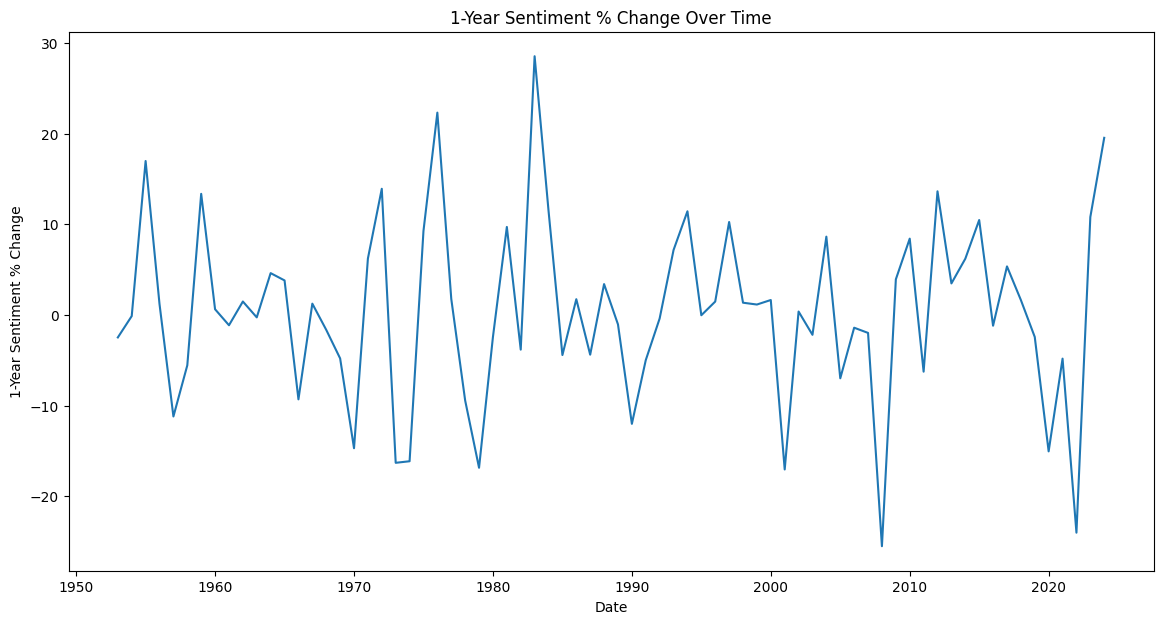

In [32]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df3, x='date', y='1yr_sentiment_pct_change')
plt.title('1-Year Sentiment % Change Over Time')
plt.xlabel('Date')
plt.ylabel('1-Year Sentiment % Change')
plt.show()

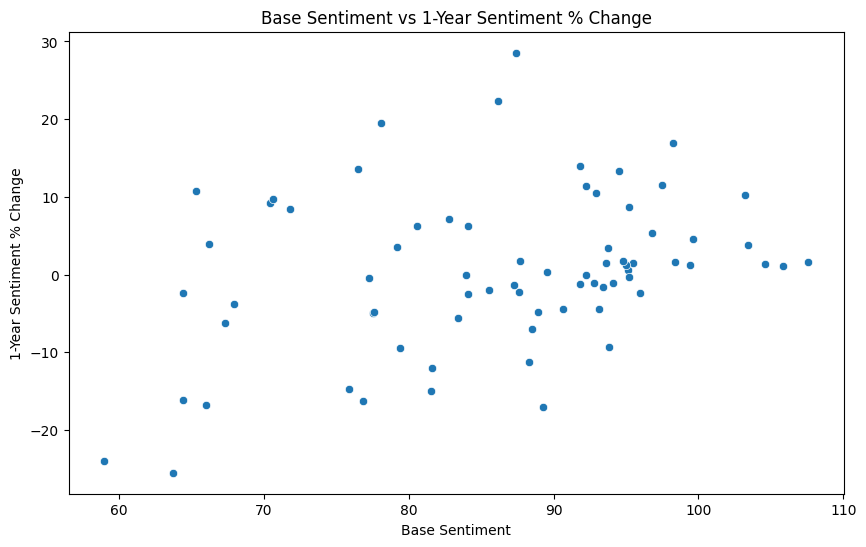

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='base_sentiment', y='1yr_sentiment_pct_change')
plt.title('Base Sentiment vs 1-Year Sentiment % Change')
plt.xlabel('Base Sentiment')
plt.ylabel('1-Year Sentiment % Change')
plt.show()

# Real GDP

In [40]:
df4 = pd.read_csv('gdp_processed.csv')
df4.head()

,date,gdp_base,1yr_gdp_pct_change
0,1947-01-01,2182.681,NaN
1,1948-01-01,2239.682,2.611513
2,1949-01-01,2260.807,0.943214
3,1950-01-01,2346.104,3.772856
4,1951-01-01,2593.967,10.564877


In [41]:
df4.describe()

,gdp_base,1yr_gdp_pct_change
count,78.000000,77.000000
mean,10032.595500,3.122697
std,6175.360424,2.574517
min,2182.681000,-3.234227
25%,4766.490750,1.679257
50%,8574.973500,3.213107
75%,15695.715250,4.315163
max,22749.846000,10.564877


In [42]:
df4.isnull().sum()

date                  0
gdp_base              0
1yr_gdp_pct_change    1
dtype: int64

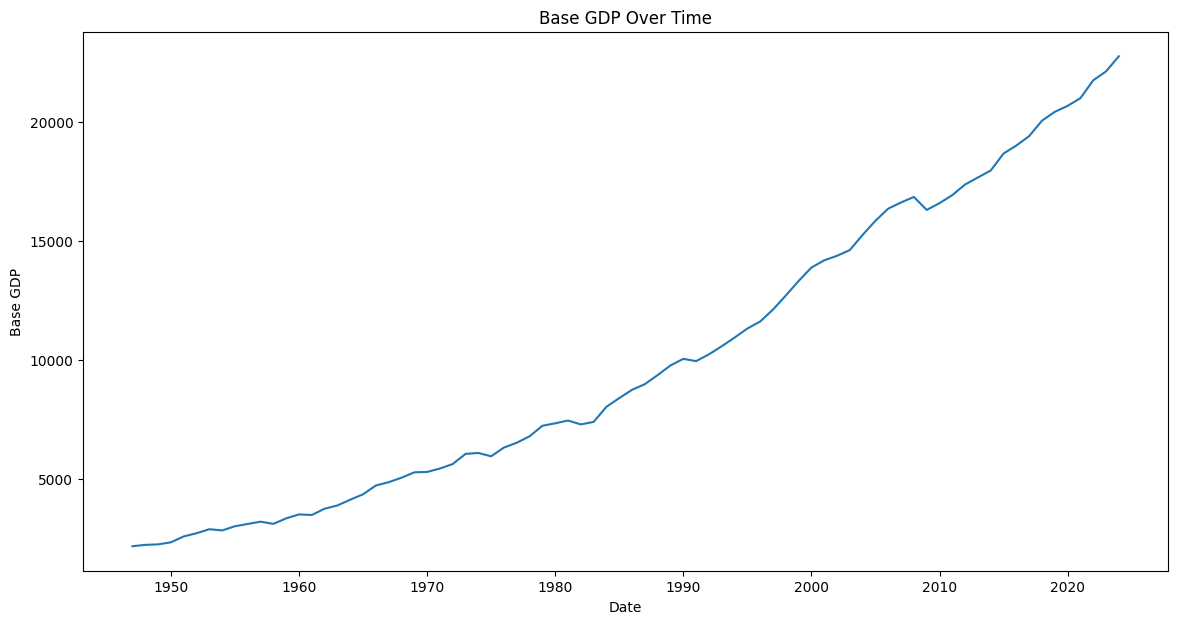

In [44]:
df4['date'] = pd.to_datetime(df4['date'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=df4, x='date', y='gdp_base')
plt.title('Base GDP Over Time')
plt.xlabel('Date')
plt.ylabel('Base GDP')
plt.show()

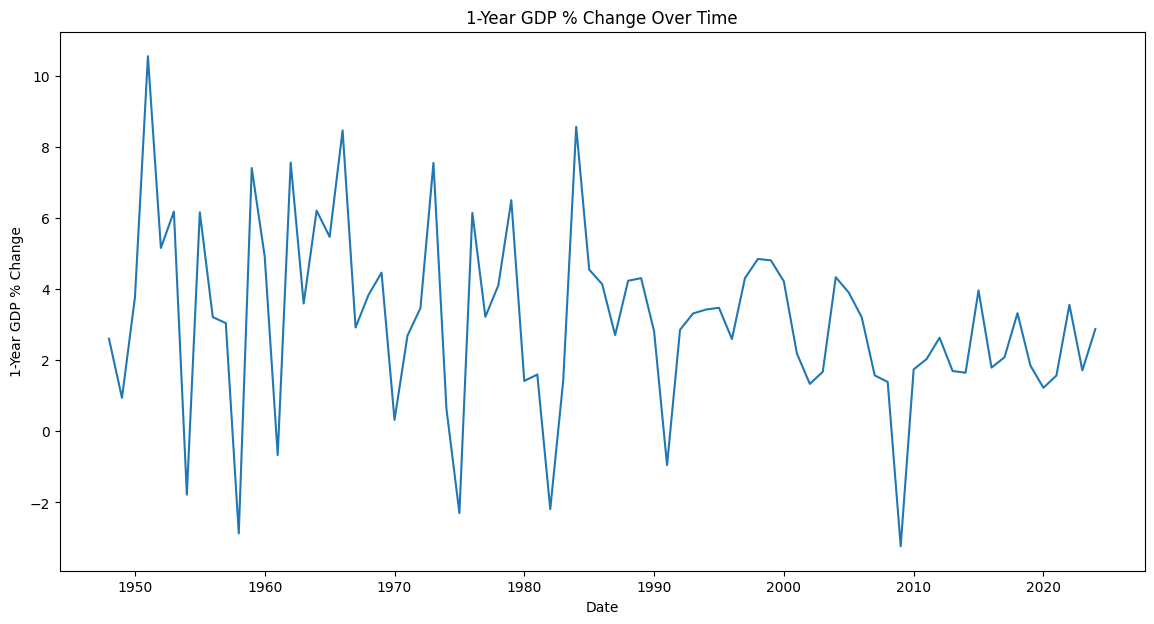

In [45]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df4, x='date', y='1yr_gdp_pct_change')
plt.title('1-Year GDP % Change Over Time')
plt.xlabel('Date')
plt.ylabel('1-Year GDP % Change')
plt.show()

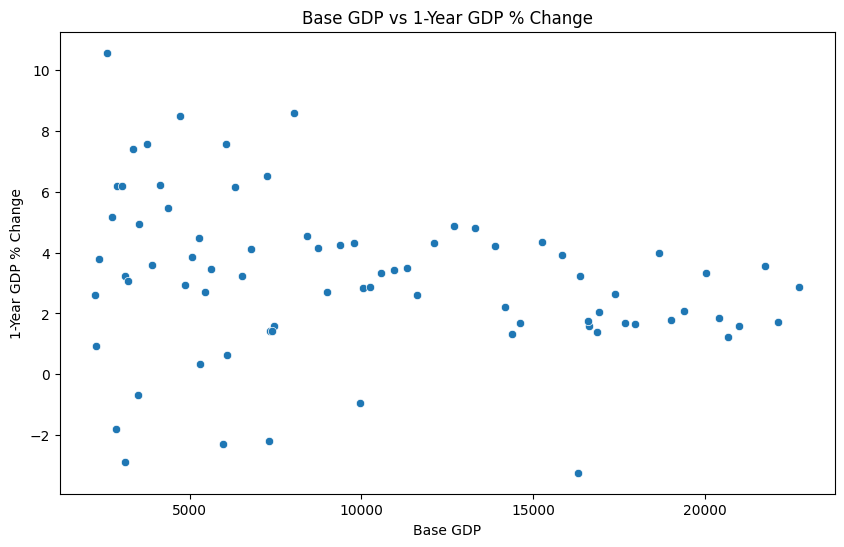

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df4, x='gdp_base', y='1yr_gdp_pct_change')
plt.title('Base GDP vs 1-Year GDP % Change')
plt.xlabel('Base GDP')
plt.ylabel('1-Year GDP % Change')
plt.show()

# Federal Funds Rate(Interest Rate)

In [48]:
df5 = pd.read_csv('fed_funds_rate_processed.csv')
df5.head()

,date,base_fed_funds_rate,1day_fed_funds_change,1yr_fed_funds_diff,1m_fed_funds_diff
0,2019-06-06,2.37,NaN,NaN,NaN
1,2019-06-07,2.37,0.0,NaN,NaN
2,2019-06-08,2.37,0.0,NaN,NaN
3,2019-06-09,2.37,0.0,NaN,NaN
4,2019-06-10,2.37,0.0,NaN,NaN


In [49]:
df5.describe()

,base_fed_funds_rate,1day_fed_funds_change,1yr_fed_funds_diff,1m_fed_funds_diff
count,1828.000000,1827.000000,1463.000000,1798.00000
mean,2.117976,0.001620,0.959098,0.04921
std,2.136197,0.048752,2.000887,0.28796
min,0.040000,-0.850000,-2.330000,-1.54000
25%,0.090000,0.000000,-0.010000,0.00000
50%,1.555000,0.000000,0.280000,0.00000
75%,4.580000,0.000000,2.265000,0.02000
max,5.330000,0.750000,4.750000,0.75000


In [50]:
df5.isnull().sum()

date                       0
base_fed_funds_rate        0
1day_fed_funds_change      1
1yr_fed_funds_diff       365
1m_fed_funds_diff         30
dtype: int64

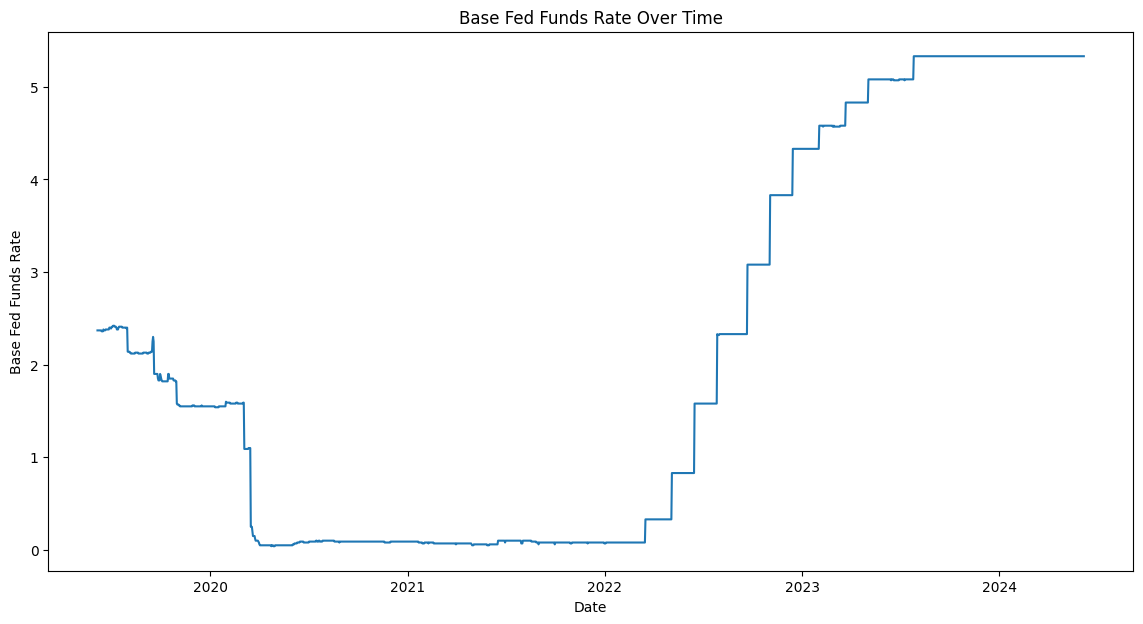

In [51]:
df5['date'] = pd.to_datetime(df5['date'])


plt.figure(figsize=(14, 7))
sns.lineplot(data=df5, x='date', y='base_fed_funds_rate')
plt.title('Base Fed Funds Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Base Fed Funds Rate')
plt.show()


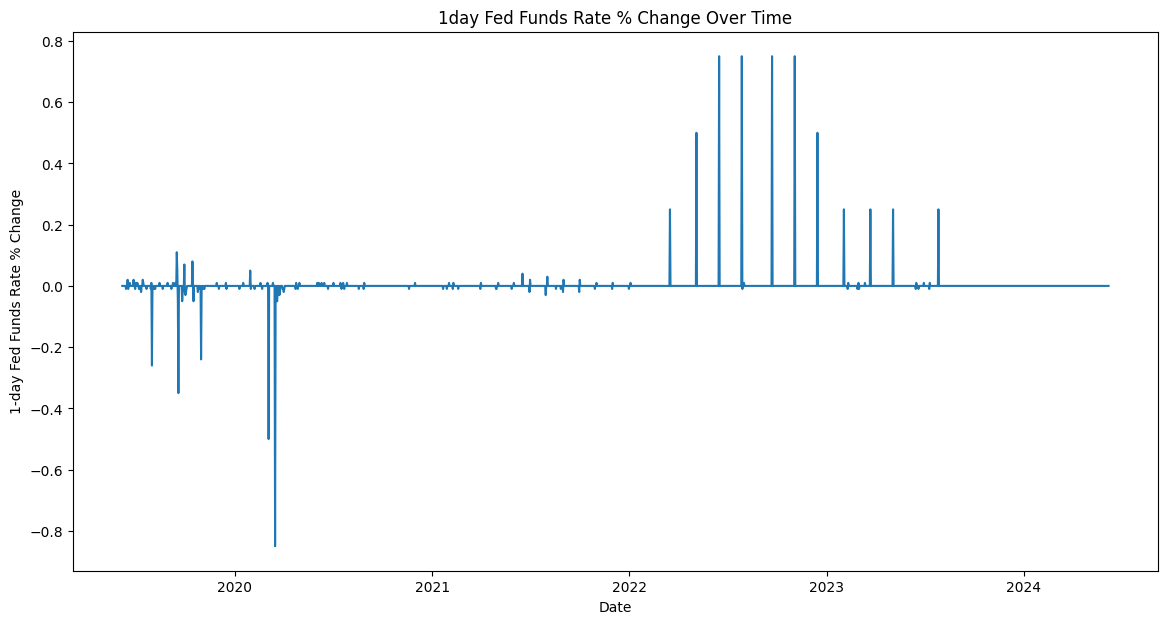

In [64]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df5, x='date', y='1day_fed_funds_change')
plt.title('1day Fed Funds Rate % Change Over Time')
plt.xlabel('Date')
plt.ylabel('1-day Fed Funds Rate % Change')
plt.show()

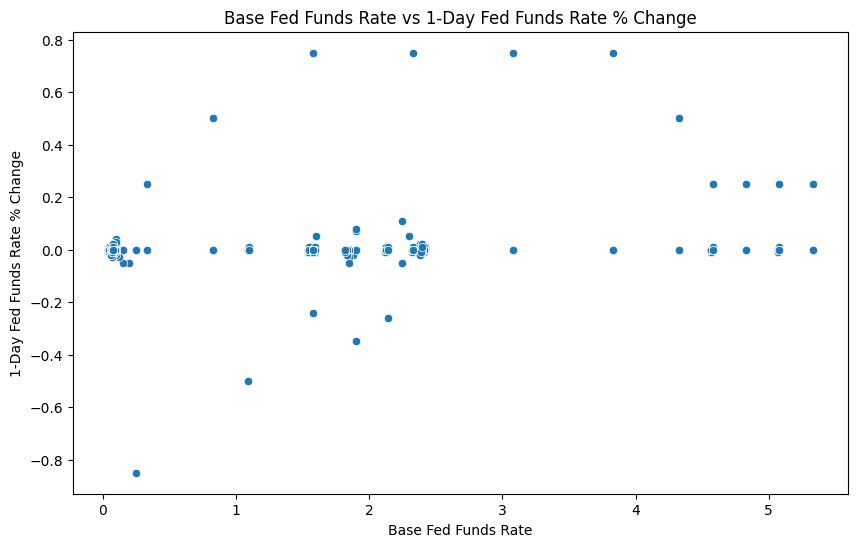

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df5, x='base_fed_funds_rate', y='1day_fed_funds_change')
plt.title('Base Fed Funds Rate vs 1-Day Fed Funds Rate % Change')
plt.xlabel('Base Fed Funds Rate')
plt.ylabel('1-Day Fed Funds Rate % Change')
plt.show()

# CPI

In [56]:
df6 = pd.read_csv('cpi_processed.csv')
df6.head()

,date,cpi_base,1yr_change
0,1960-01-01,1.457976,NaN
1,1961-01-01,1.070724,-0.387252
2,1962-01-01,1.198773,0.128049
3,1963-01-01,1.239669,0.040896
4,1964-01-01,1.278912,0.039242


In [57]:
df6.describe()

,cpi_base,1yr_change
count,63.000000,62.000000
mean,3.764840,0.105562
std,2.784628,1.742339
min,-0.355546,-4.203288
25%,1.855129,-0.723762
50%,3.015075,0.142720
75%,4.499197,1.062682
max,13.549202,4.877045


In [58]:
df6.isnull().sum()

date          0
cpi_base      0
1yr_change    1
dtype: int64

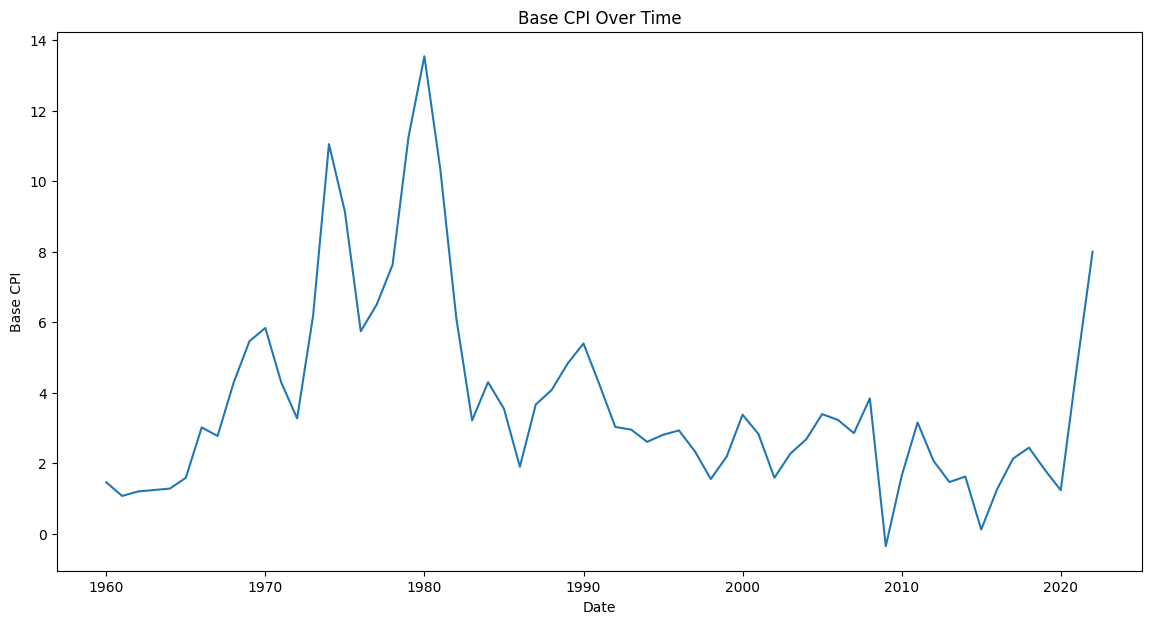

In [60]:
df6['date'] = pd.to_datetime(df6['date'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=df6, x='date', y='cpi_base')
plt.title('Base CPI Over Time')
plt.xlabel('Date')
plt.ylabel('Base CPI')
plt.show()

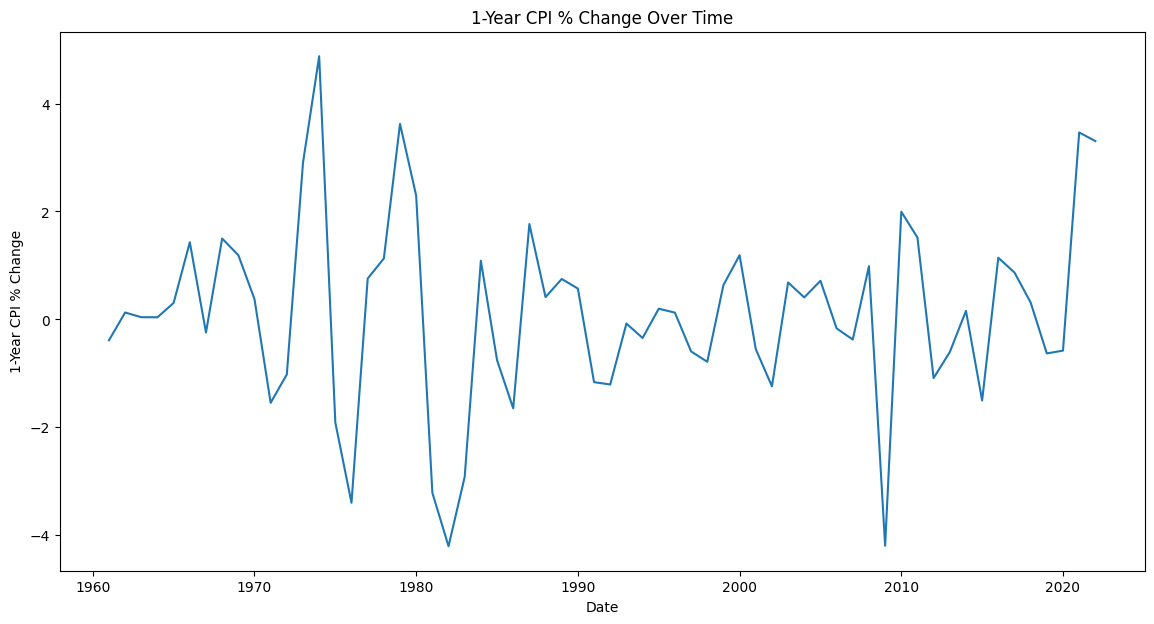

In [61]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df6, x='date', y='1yr_change')
plt.title('1-Year CPI % Change Over Time')
plt.xlabel('Date')
plt.ylabel('1-Year CPI % Change')
plt.show()


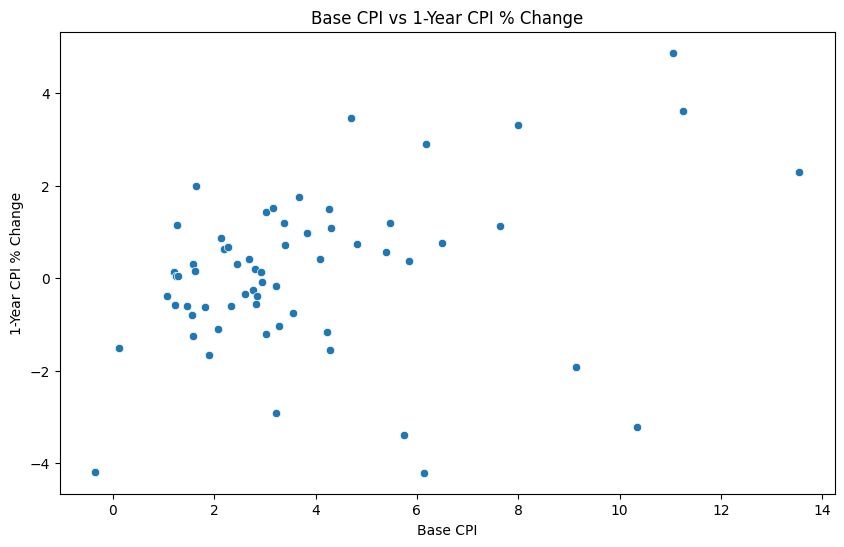

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df6, x='cpi_base', y='1yr_change')
plt.title('Base CPI vs 1-Year CPI % Change')
plt.xlabel('Base CPI')
plt.ylabel('1-Year CPI % Change')
plt.show()

# sp_price_action_processed

In [66]:
df7 = pd.read_csv('sp_price_action_processed.csv')
df7.head()

,price,volume,price_1d_diff,price_1m_diff,volume_1d_diff,volume_1m_diff,price_pct_change,rolling_mean_price_7d,rolling_std_price_7d,rolling_mean_volume_7d,rolling_std_volume_7d,momentum_14d,ema_20d
0,16.66,1260000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.660000
1,16.85,1890000.0,0.19,NaN,630000.0,NaN,1.140456,NaN,NaN,NaN,NaN,NaN,16.678095
2,16.93,2550000.0,0.08,NaN,660000.0,NaN,0.474777,NaN,NaN,NaN,NaN,NaN,16.702086
3,16.98,2010000.0,0.05,NaN,-540000.0,NaN,0.295334,NaN,NaN,NaN,NaN,NaN,16.728554
4,17.08,2520000.0,0.10,NaN,510000.0,NaN,0.588928,NaN,NaN,NaN,NaN,NaN,16.762025


In [70]:
df7.columns

Index(['price', 'volume', 'price_1d_diff', 'price_1m_diff', 'volume_1d_diff',
       'volume_1m_diff', 'price_pct_change', 'rolling_mean_price_7d',
       'rolling_std_price_7d', 'rolling_mean_volume_7d',
       'rolling_std_volume_7d', 'momentum_14d', 'ema_20d'],
      dtype='object')

In [71]:
df7.describe()

,price,volume,price_1d_diff,price_1m_diff,volume_1d_diff,volume_1m_diff,price_pct_change,rolling_mean_price_7d,rolling_std_price_7d,rolling_mean_volume_7d,rolling_std_volume_7d,momentum_14d,ema_20d
count,18731.000000,1.873100e+04,18730.000000,18710.000000,1.873000e+04,1.871000e+04,18730.000000,18725.000000,18725.000000,1.872500e+04,1.872500e+04,18717.000000,18731.000000
mean,809.832317,1.166771e+09,0.288541,5.934145,1.447531e+05,4.280354e+06,0.035829,809.228712,8.085467,1.166603e+09,1.493144e+08,3.961096,807.153097
std,1094.219117,1.750857e+09,14.906004,62.640264,3.826482e+08,5.818885e+08,0.991327,1092.719195,14.259186,1.726405e+09,2.772154e+08,51.312480,1089.253720
min,16.660000,6.800000e+05,-324.890137,-1100.350098,-5.044220e+09,-6.884230e+09,-20.466931,16.804286,0.032514,8.628571e+05,4.618802e+04,-857.110107,16.660000
25%,88.889999,1.032000e+07,-0.859998,-2.459999,-1.068500e+07,-1.430750e+07,-0.407661,88.998571,0.562715,1.059714e+07,1.222739e+06,-2.239990,88.848088
50%,253.039993,1.398200e+08,0.050002,1.250000,0.000000e+00,5.000000e+04,0.048856,252.687147,1.892717,1.458214e+08,1.801991e+07,0.860001,253.014955
75%,1223.719971,1.997595e+09,1.270002,11.307495,1.029750e+07,1.793750e+07,0.507287,1222.922851,10.255348,2.106487e+09,1.890607e+08,8.460083,1222.840986
max,5421.029785,1.145623e+10,230.380127,561.910157,4.637230e+09,8.092740e+09,11.580037,5344.362793,217.391597,8.540511e+09,2.403739e+09,524.229981,5299.234825


In [72]:
df7.isnull().sum()

price                      0
volume                     0
price_1d_diff              1
price_1m_diff             21
volume_1d_diff             1
volume_1m_diff            21
price_pct_change           1
rolling_mean_price_7d      6
rolling_std_price_7d       6
rolling_mean_volume_7d     6
rolling_std_volume_7d      6
momentum_14d              14
ema_20d                    0
dtype: int64

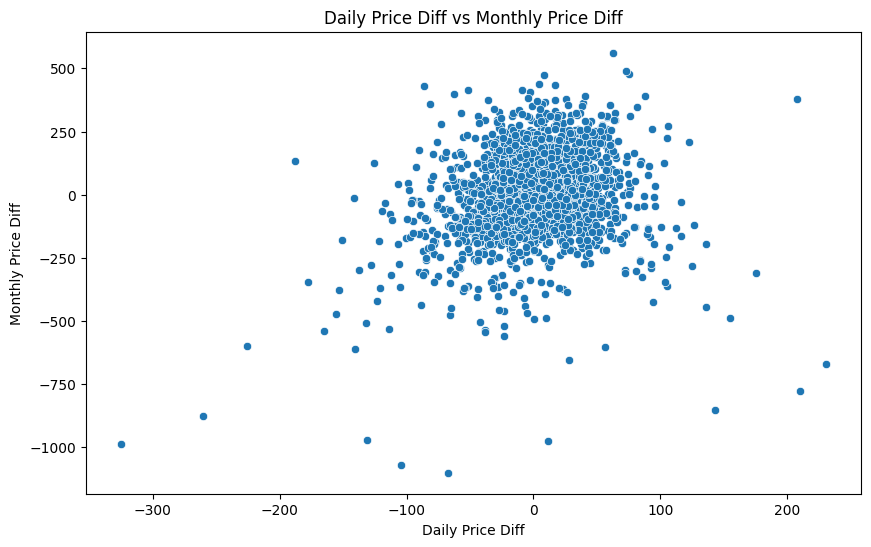

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df7, x='price_1d_diff', y='price_1m_diff')
plt.title('Daily Price Diff vs Monthly Price Diff')
plt.xlabel('Daily Price Diff')
plt.ylabel('Monthly Price Diff')
plt.show()

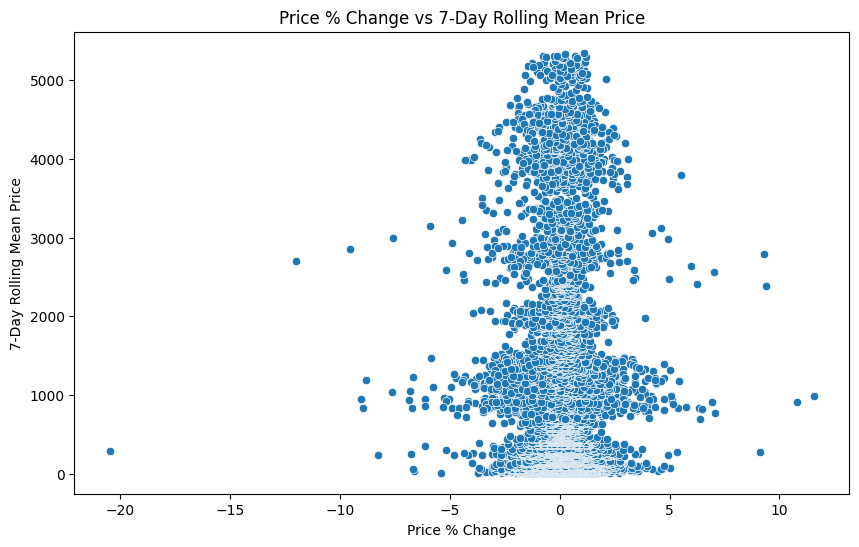

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df7, x='price_pct_change', y='rolling_mean_price_7d')
plt.title('Price % Change vs 7-Day Rolling Mean Price')
plt.xlabel('Price % Change')
plt.ylabel('7-Day Rolling Mean Price')
plt.show()

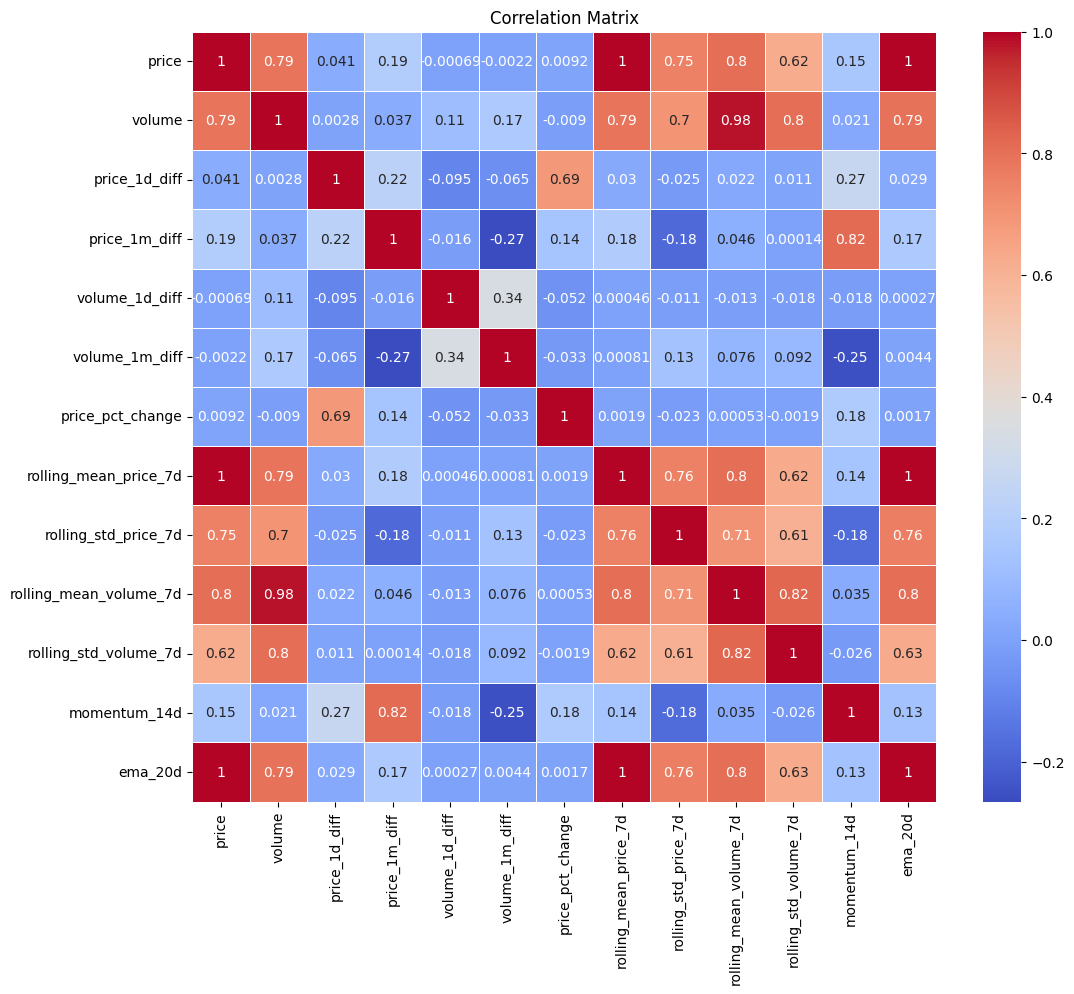

In [78]:
correlation_matrix = df7.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()